# Taller 2

**Fecha de entrega:** Sabado 13 de Septiembre

**Instrucciones:** Este taller debe ser entregado de manera individual a través de [Bloque Neón](https://tecnologia.uniandes.edu.co/bloqueneon/). A pesar de que la entrega es individual, se promueve el trabajo en grupos.

## Pregunta 1
Asuma que usted quiere estimar el modelo $y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$ usando los siguientes datos:

| *y*  | *x*   |
|----|----|
| 10 | -20 |
| 12 | -10 |
| 15 | -8  |
| 16 | -8  |
| 20 | 5   |

1. Calcule $\hat{\beta}_0$ y $\hat{\beta}_1$.
2. Calcule el error estándar del modelo.
3. Evalue si $\beta_1 = 0$.
4. Calcule SST, SSR, y SSE.
5. Calcule el $R^2$.
6. Usando STATA o R, calcule los $\hat{y}_i$ y $e_i$.
7. Usando STATA o R, haga una tabla pequeña con las estadísticas descriptivas de $\hat{y}_i$ y $e_i$.

## Solución

1. Usando nuestra solución de MCO

$$\hat\beta_1 = \frac{\sum_i (X_i - \overline X)(Y_i - \overline Y)}{\sum_i (X_i - \overline X)^2} \approx \frac{130,6}{316,8} \approx 0,412$$
$$\hat\beta_0 = \overline Y - \hat\beta_1 \overline X = 14,6 - (0,412)(-8,2) \approx 17,98$$

2. Un estimador para $\sigma$ es $\sqrt{\frac{\sum_i e_i^2}{n-k}} \approx \sqrt{\frac{5.3605}{5-2}} \approx \sqrt{1.787} \approx 1.337$

3. Queremos evaluar si 

$$H_0 : \beta_1 = 0$$
$$H_1 : \beta_1 \neq 0$$

Para ello usamos nuestro estadístico $T = \frac{\hat\beta_1}{\text{ee}(\hat\beta_1)}$, donde $\text{ee}(\hat\beta_1) = \sqrt{ \frac{\sum_i e_i^2/n-K}{\sum_i (X_i - \overline X)^2}} \approx \sqrt{\frac{1.787}{1.337}} \approx 0.0751$. Luego, $T = \frac{0,412}{0.0751} \approx 5.49$

Para $\alpha = 0.05$, $t_{\alpha/2} = -3.182$ y $t_{1-\alpha/2} = 3.182$. Nuestra región de rechazo de $H_0$ es $T > |t_{\alpha/2}|$. 

Ya que $5.49 > 3.182$. Rechazamos $H_0$ en favor de $H_1$.

4. $SST = \sum^n_{i = 1} (Y_i -\bar{Y})^2 = 59.2, \hspace{5pt} SSR = \sum_i (\hat Y_i -\bar{Y})^2 = 53.83952, \hspace{5pt}$ y $\hspace{5pt} SSE = \sum_i (Y_i - \hat Y_i)^2 = 5.36048$ 

5. $R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST} = \frac{53.83952}{59.2} \approx 0.909$

6. $\hat y = [9.73, 13.86, 14.68, 14.68, 20.04]'$ y $e = [0.26, -1.86,  0.32,  1.32, -0.04]'$

7. La siguiente tabla presenta estadísticas descriptivas para $\hat y_i$ y $e_i$

|        | $e$      |$\hat y$|
|--------|----------|--------|
| min    | -185,80  | 9,735  |
| Q1     | -0,04    | 13,858 |
| Mediana| 0,26     | 14,682 |
| Media  | 0,00     | 14,6   |
| Q3     | 0,32     | 14,682 |
| max    | 131,76   | 20,042 |

In [40]:
#Datos
y <- c(10, 12, 15, 16, 20)
x <- c(-20, -10, -8, -8, 5)
n <- length(x)

#Estimar modelo
b1 <- cov(y, x)/var(x); print(paste("b1 =", b1))
b0 <- mean(y) - b1*mean(x); print(paste("b0 =", b0))

#Residuales
e = y - (b0 + b1*x); print(paste("sigma2 =", sum(e^2)/(n-2)))

#Prueba de hipotesis
ee_b1 = sqrt((sum(e^2)/(n-2))/sum((x-mean(x))^2))
T = b1/ee_b1; print(paste("Estadistico T =", T))

alpha = 0.05
tc = qt(alpha/2, n-2) #t critico
if (T > abs(tc)) {
    print(paste("Ya que T = ", T, "> |t_c| = ", abs(tc), ", Rechace H0"))
}else {
    print("No rechace H0")    
}

#Bondad de Ajuste
SST = sum((y-mean(y))^2);  print(paste("SST =", SST))
SSR = sum(((b0 + b1*x)-mean(y))^2);  print(paste("SSR =", SSR))
SSE = sum((y-(b0 + b1*x))^2);  print(paste("SSE =", SSE))
R2 = SSR/SST;  print(paste("R2 =", R2))

#Prediccion del modelo 
yhat = (b0 + b1*x)

summary(e)
summary(yhat)

[1] "b1 = 0.412247474747475"
[1] "b0 = 17.9804292929293"
[1] "sigma2 = 1.7868265993266"
[1] "Estadistico T = 5.48920418815368"
[1] "Ya que T =  5.48920418815368 > |t_c| =  3.18244630528371 , Rechace H0"
[1] "SST = 59.2"
[1] "SSR = 53.8395202020202"
[1] "SSE = 5.3604797979798"
[1] "R2 = 0.909451354763855"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.85795 -0.04167  0.26452  0.00000  0.31755  1.31755 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.735  13.858  14.682  14.600  14.682  20.042 

## Pregunta 2
Asuma un modelo de regresión con intercepto. Los datos muestran lo siguiente:

$$X'X = \begin{bmatrix} 33 & 0 & 0 \\ 0 & 40 & 20 \\ 0 & 20 & 60 \end{bmatrix}, \quad X'Y = \begin{bmatrix} 132 \\ 24 \\ 92 \end{bmatrix}, \quad \sum (y_i - \bar{y})^2 = 150$$

1. ¿Cuál es el tamaño de la muestra?
2. Estime los parámetros $\beta_0, \beta_1, \beta_2$.
3. Estime el error estándar de $\hat{\beta}_2$ y evalúe la significancia de $\beta_2$ (nivel de significancia 5%).
4. Calcule el $R^2$. 

## Solución 

1. El tamaño de muestra es $n = 33$

2. Para estimar los parámetros $\beta_0, \beta_1, \beta_2$, podemos usar nuestra solución de MCO, es decir, $\hat\beta = (X'X)^{-1}(X'Y)$. 

$$\hat \beta = \begin{bmatrix} \hat\beta_0 \\ \hat\beta_1 \\ \hat\beta_2 \end{bmatrix} = (X'X)^{-1}(X'Y) = \begin{bmatrix} 0.0\overline{30} & 0 & 0 \\ 0 & 0.03 & -0.01 \\ 0 & -0.01 & 0.02 \end{bmatrix} \begin{bmatrix} 132 \\ 24 \\ 92 \end{bmatrix} =  \begin{bmatrix} 4.0 \\ -0.2 \\ 1.6 \end{bmatrix}$$

3. La matriz de varianza-covarianza se puede estimar usando la siguiente expresión, $\hat V(\hat \beta) = \hat\sigma^2 (X'X)^{-1}$, donde $\hat\sigma^2 = \frac{\sum_i e_i^2}{n-k}$

Observe que $\sum^n_i y_i = 132$, entonces $\bar{y} = 4$. Además, $\sum^n_i  (y_i - \bar{y})^2 = \sum^n_i y_i^2 - n \bar y^2 = 150$. Luego, 

$$\sum^n_i y_i^2 = 150 + n \bar y^2 = 150 + 33(4)^2=678$$

Observe ahora que 

\begin{align*}
    y_i & = \hat y_i + e_i \\
    \sum^n_i y_i^2 & = \sum^n_i \hat y_i^2 + \sum^n_i e_i^2 \\
    y'y & = \beta x' x\beta + e'e \\
    678 & =  670.4 + e'e \\
    7.6 & = e'e
\end{align*}

Así, $\hat\sigma^2 = \frac{7.6}{33-3}$. Luego $ee(\hat\beta_2) = \sqrt{\frac{7.6}{30} \frac{2}{100}} = 0.0712$. 

Queremos evaluar si 

$$H_0 : \beta_2 = 0$$
$$H_1 : \beta_2 \neq 0$$

Para ello usamos nuestro estadístico $T = \frac{\hat\beta_2}{\text{ee}(\hat\beta_2)} = \frac{1.6}{0.0712}\approx22.478$. Ya que $T = 22.478 > |t_{\alpha/2, n-k}| = 2.042$, entonces rechazamos $H_0$.

4. Recuerde que $R^2 = \frac{\sum_i^n (\hat y_i - \bar y)^2}{\sum_i^n (\hat y_i - \bar y)^2} = \frac{\sum_i^n (\hat y_i)^2 - n \bar y^2}{150} = \frac{142.4}{150}\approx0.095$

In [41]:
#Informacion
XX <- cbind(c(33, 0, 0), c(0, 40, 20), c(0, 20, 60))
XX1 <- solve(XX)

#Estimacion por MCO
B = XX1%*%c(132, 24, 92); print(paste("B0 =", B[1,1], "B1 =", B[2,1], "B2 =", B[3,1]))

#Suma de la variable dependiente al cuadrado
sum_y2 = 150 + 33*(132/33)^2; print(paste("sum_y2 =", sum_y2))

#Suma de las predicciones al cuadrado
sum_yhat2 = t(B)%*%XX%*%B; print(paste("sum_yhat2 =", sum_yhat2))

#Varianza del modelo
sigma2_hat = (sum_y2 - sum_yhat2)/(33-3); print(paste("sigma2_hat =", sigma2_hat))

#Matrix de varianza-covarianza
V = as.numeric(sigma2_hat)*XX1; V

#Error estandar de b2
ee_b2 = sqrt(V[3,3]); print(paste("Error Estandar de b2 =", ee_b2))

#Estadistico de prueba
T = B[3,1]/ee_b2; print(paste("Estadistico T =", T))

alpha = 0.05
tc = qt(alpha/2, 33-3) #t critico
if (T > abs(tc)) {
    print(paste("Ya que T = ", T, "> |t_c| = ", abs(tc), ", Rechace H0"))
}else {
    print("No rechace H0")    
}

#R2
SSR = sum_yhat2 - 33*(4)^2
SST = 150
R2 = SSR/SST; print(paste("R2 =", R2))

[1] "B0 = 4 B1 = -0.2 B2 = 1.6"
[1] "sum_y2 = 678"
[1] "sum_yhat2 = 670.4"
[1] "sigma2_hat = 0.25333333333333"


0.007676768,0.000000000,0.000000000
0.000000000,0.007600000,-0.002533333
0.000000000,-0.002533333,0.005066667


[1] "Error Estandar de b2 = 0.0711805216802083"
[1] "Estadistico T = 22.4780594779608"
[1] "Ya que T =  22.4780594779608 > |t_c| =  2.04227245630124 , Rechace H0"
[1] "R2 = 0.949333333333334"


## Pregunta 3
Defina $f_i$ de la siguiente manera:

$$f_i = \begin{cases} 1 & \text{si el individuo es una mujer} \\ 0 & \text{si el individuo es un hombre} \end{cases}$$

$w_i$ representa el salario de cada individuo. Asuma que tiene una muestra de $n$ individuos, con $n_F$ mujeres y $n_M$ hombres ($n = n_F + n_M$). Considere ahora la siguiente regresión:

$$w_i = \beta_0 + \beta_1 f_i + \varepsilon_i$$

1. Demuestre que los estimadores de MCO son $\hat{\beta}_1 = \bar{w}_F - \bar{w}_M$ y $\hat{\beta}_0 = \bar{w}_M$.
2. ¿Cómo evaluaría usted si hay discriminación de género en el salario de los individuos?

## Solución 

1. Usando los estimadores de MCO podemos concluir que: 

$$\hat\beta_1 = \frac{\sum_i (f_i - \overline f)(w_i - \overline w)}{\sum_i (f_i - \overline f)^2} = \frac{n_F \bar w_F - n_F \bar w - \frac{n_F}{n} \bar w n + \frac{n_F}{n}\bar w n}{n_F - n(\frac{n_F}{n})^2} = \frac{n_F\bar w_F - n_F\bar w}{n_F n_M \frac{1}{n}} = \frac{n \bar w_F}{n_M} - \frac{n\bar w}{n_M} = \frac{n \bar w_F}{n_M} - \frac{n_F \bar w_F}{n_M} - \bar w_M = \bar w_F - \bar w_M$$ 

$$\hat\beta_0 = \overline w - \hat\beta_1 \overline f = \overline w -  (\bar w_F - \bar w_M)\frac{n_F}{n} = \bar w_F\frac{n_F}{n} + \bar w_M\frac{n_M}{n} - (\bar w_F - \bar w_M)\frac{n_F}{n} = \bar w_M \frac{n_F + n_M}{n} = \bar w_M$$

2. Usando este modelo podemos evaluar si existe o no discriminación de género con la siguiente prueba de hipótesis:

$$H_0: \beta_1 = 0$$
$$H_1: \beta_1 < 0$$

El estadístico de prueba que nos permite concluir si existe o no discriminación es: $T = \frac{\hat \beta_1}{ee(\hat \beta_1)} \sim t_{n-k}$. Con un nivel de significancia de $\alpha = 0.05$, podemos rechazar que $\beta_1 = 0$ si $T < t_{\alpha, n-k}$

## Pregunta 4
La base de datos `hprice.dta` ([Descargar](https://github.com/smontanoc/microeconometria/blob/main/Datos/hprice.dta)) contiene información sobre el precio de viviendas en Estados Unidos y contempla además información a nivel municipal.



- `price`: precio en dólares de 506 viviendas reportadas.
- `lprice`: logaritmo natural del precio.
- `crime`: tasa per cápita de crímenes.
- `nox`: número de partículas de óxido nitroso en 100 ppm.
- `rooms`: promedio de habitaciones por vivienda.
- `dist`: distancia ponderada a los 5 principales centros de empleo.
- `radial`: índice de accesibilidad a autopistas.
- `proptax`: impuesto de propiedad por cada mil dólares.
- `stratio`: valor promedio de estudiantes por docente.
- `lowstat`: porcentaje de personas de bajos estratos.

1. Cree un do-file documentado y muestre que carga la base de datos `hprice.dta` desde un directorio. Para cada punto en adelante, ponga el código del do-file que utilizó.
2. Obtenga y analice los siguientes estadísticos: percentil 25, 50, 75, máximo, mínimo, media y desviación estándar para `price`, `crime`, `lowstat`, y `dist`. Interprete sus resultados.
3. Realice una prueba en STATA para determinar si la media de la variable `dist` es menor a 3.8.
4. Realice un histograma de `price` y `crime`. Interprete la distribución.
5. Realice un análisis de correlación entre `price`, `crime`, `lowstat`, `nox`, `dist`, `proptax`, y `rooms`. Evalúe la significancia de los coeficientes. Plantee la hipótesis nula y alterna para uno de los coeficientes y concluya a partir de los resultados obtenidos, teniendo en cuenta el p-valor y el t-estadístico resultante.
6. Haga un gráfico de dispersión entre:
   - `price` vs `crime`
   - `price` vs `lowstat`
   - `price` vs `rooms`

¿Las gráficas tienen sentido a la luz de los coeficientes de correlación?

## Solución 

El código en R presentado abajo da respuesta a los diferentes numerales de la pregunta 4. A continuación comentamos los resultados obtenidos:

2. Una propiedad en la base de datos cuesta en promedio $\$22,512$, con una desviación de $\$9,208$. La tasa de crimen promedio es de 3.6 en los vecindarios de estas propiedades, y el porcentaje promedio de personas de bajo estrato es de 12.7. Finalmente, la distancia promedio a los centros de empleo es de 3.8 millas.

3. Con un p-valor de 0.482 no podemos rechazar que la distancia promedio a los centros de empleo sea igual a 3.8.

4. El histograma de precios revela una bimodalidad en el costo de las propiedades. Esto sugiere que existe un conjunto importante de inmuebles de alto valor (más de $\$50,000$) al igual que propiedades de menor valor (menos de $\$20,000$). El histograma de crimen sugiere que la tasa per-capita de criminalidad es bajo en la mayoría de las propiedades.

5. Considere el siguiente modelo:

$$price_i = \beta_0 + \beta_1 crime_i + \beta_2 lowstat_i + \beta_3 nox_i + \beta_4 dist_i + \beta_5 proptax_i + \beta_6 rooms_i + \varepsilon_i$$

Las estimaciones por MCO se presentan abajo. Para cada uno de estos coeficientes podemos realizar pruebas de hipotesis individuales. La prueba de significancia toma la siguiente forma, para $j \in \{1, 2, ..., 6\}$:

$$H_0: \beta_j = 0$$
$$H_1: \beta_j \neq 0$$

Nuestras estimaciones sugieren que tener una habitación adicional incrementa el precio de un inmueble en $\$5,099$, una milla adicional a los centros de empleo reduce el precio en $\$1,011$, un incremento de una unidad en la tasa de crimen per-capita reduce el precio en $\$77$, incrementar en 1 punto porcentual el porcentaje de personas de estrato bajo reduce el precio en $\$555$. Incrementar en 100ppm el promedio de particulas de óxido nitroso reduce el precio en $\$913$, y incrementar el impuesto en $\$1,000$ dolares reduce el precio de la propiedad en $\$70$ dolares. El estadístico $t$ para cada uno de estos coeficientes es (en valor absoluto) mayor a 1.96, lo que sugiere que todos son significativos al 5\%. El p-valor más grande (0.02631) lo presenta el coeficiente ($\beta_2$) asociado al porcentaje de personas de bajo estrato.

6. Los diagramas de dispersión entre precio, tasa de crimen, porcentaje de personas de bajo estrato, y número de habitaciones, muestran relaciónes que son coherentes con las estimaciones del modelo por MCO.


The downloaded binary packages are in
	/var/folders/b8/49g109jd3q9fzp3y0ccjzdbw0000gn/T//RtmpikMTj9/downloaded_packages


Warning message:
“package ‘haven’ was built under R version 4.3.3”


     price           crime            lowstat            dist       
 Min.   : 5000   Min.   : 0.0060   Min.   : 1.730   Min.   : 1.130  
 1st Qu.:16850   1st Qu.: 0.0820   1st Qu.: 6.923   1st Qu.: 2.100  
 Median :21200   Median : 0.2565   Median :11.360   Median : 3.210  
 Mean   :22512   Mean   : 3.6115   Mean   :12.701   Mean   : 3.796  
 3rd Qu.:24999   3rd Qu.: 3.6770   3rd Qu.:17.058   3rd Qu.: 5.188  
 Max.   :50001   Max.   :88.9760   Max.   :39.070   Max.   :12.130  

[1] 9208.86


	One Sample t-test

data:  dist
t = -0.045381, df = 505, p-value = 0.4819
alternative hypothesis: true mean is less than 3.8
95 percent confidence interval:
    -Inf 3.95004
sample estimates:
mean of x 
 3.795751 



Call:
lm(formula = price ~ crime + lowstat + nox + dist + proptax + 
    rooms)

Residuals:
   Min     1Q Median     3Q    Max 
-16100  -3123  -1085   1918  29042 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9560.78    3971.32   2.407  0.01643 *  
crime         -77.88      34.95  -2.228  0.02631 *  
lowstat      -555.68      51.17 -10.859  < 2e-16 ***
nox          -913.49     377.51  -2.420  0.01589 *  
dist        -1011.54     179.35  -5.640 2.85e-08 ***
proptax       -69.74      21.34  -3.268  0.00116 ** 
rooms        5099.58     432.14  11.801  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5346 on 499 degrees of freedom
Multiple R-squared:  0.667,	Adjusted R-squared:  0.663 
F-statistic: 166.6 on 6 and 499 DF,  p-value: < 2.2e-16


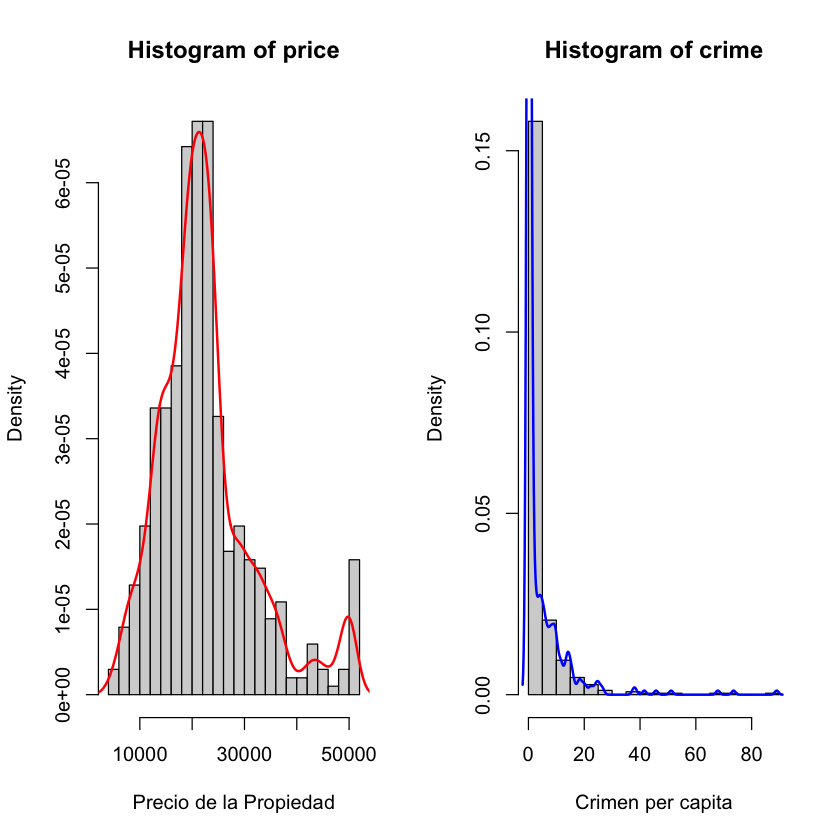

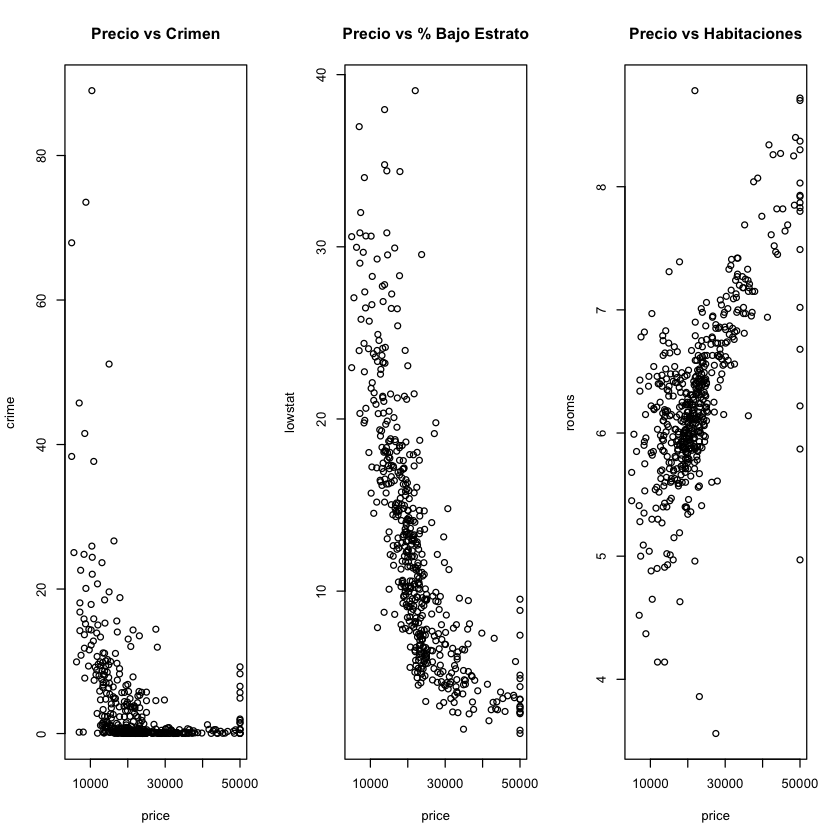

In [1]:
rm(list = ls())

install.packages('haven')
library('haven')

#Cargar datos
link_datos <- 'https://www.dropbox.com/scl/fi/cb33y4cvuk1vo4qupcxhk/hprice.dta?rlkey=qll7109zf53kpw9b8kn5qkqeg&dl=1'
hprice <- read_dta(link_datos)
attach(hprice)

#Estadisticas descriptivas
summary(hprice[, c('price', 'crime', 'lowstat', 'dist')])
round(sd(price), 2)

#Prueba de hipotesis (t-test)
t.test(dist, mu = 3.8, alternative = 'less')

#Histogramas
par(mfrow=c(1,2))
hist(price, xlab = "Precio de la Propiedad", probability = TRUE, breaks = 30)
lines(density(price, na.rm=T), lwd = 2, col = "red")
hist(crime, xlab = "Crimen per capita", probability = TRUE, breaks = 30)
lines(density(crime, na.rm=T), lwd = 2, col = "blue")

#Analisis de correlación
model <- lm(price ~ crime + lowstat + nox + dist + proptax + rooms)
summary(model)

#Diagramas de disperción
par(mfrow=c(1,3))
plot(price, crime, main = 'Precio vs Crimen')
plot(price, lowstat, main = 'Precio vs % Bajo Estrato')
plot(price, rooms, main = 'Precio vs Habitaciones')

detach(hprice)

## Pregunta 5

En la base de datos `rent.dta` ([Descargar](https://github.com/smontanoc/microeconometria/blob/main/Datos/rent.dta)), ustedes encontrarán información para 300 propiedades en Estados Unidos y sus características. 

- `rent`: arriendo que se paga por la propiedad
- `lavaplatos`: 1 si lavaplatos  
- `cancha_tennis`: 1 si cancha de tennis  
- `sauna`: 1 si sauna  
- `parque_ninos`: 1 si tiene parque de niños  
- `mal_barrio`: 1 si está en mal barrio  
- `servicios_incluidos`: 1 si tiene servicios incluidos  
- `amoblado`: 1 si amoblado  
- `prop_no_eficiente`: 1 si es una propiedad no eficiente  
- `dos_habitaciones`: 1 si tiene dos habitaciones  
- `tres_habitaciones`: 1 si tiene tres habitaciones  
- `cuatro_habitaciones`: 1 si tiene cuatro habitaciones  

1. Estime por MCO un modelo en que el arriendo sea la variable dependiente y todas las variables categóricas sean las variables independientes. Presente sus resultados.  

2. Interprete el coeficiente asociado a `mal_barrio`, `dos_habitaciones`, `tres_habitaciones`, y `cuatro_habitaciones`.  

3. Cree una variable identificando las propiedades que tienen una habitación (tenga en cuenta que el máximo número de habitaciones es cuatro y el mínimo es uno). Vuelva y estime el modelo incluyendo esta variable creada. Discuta sus resultados.  

4. Realice una prueba F-parcial para determinar si las variables que no son significativas (al 10 %) en la regresión del punto 1 deben ser o no incluidas en el modelo.  

## Solución 

El código en R presentado abajo da respuesta a los diferentes numerales de la pregunta 5. A continuación comentamos los resultados obtenidos:

2. El arriendo de una propiedad en un mal barrio es 43 dolares menor que el arriendo de propiedades en otro tipo de barrio. La renta de un apartamento con dos, tres, y cuatro habitaciónes es respectivamente 58, 92, y 137 dolares mayor que el arriendo de un apartamentanto con 1 habitación. Estos resultados son estadísticamente significativos a un nivel del 1%.

3. El conjunto de variables binarias que indican el número de cuartos que tiene una vivienda es colineal con el vector de 1 asociado al intercepto del modelo. Por esta razón no podemos estimar los coeficientes para todas las categorías o número de habitaciones.

4. Las siguientes variables no son individualmente significativas: `cancha_tennis`, `sauna`, `parque_ninos`, y `servicios_incluidos`. Corremos nuestro modelo excluyendo estas variables (es decir, estimamos el modelo restringido).

Sea $\beta_{exc}$ los coeficientes asociados a las variables que excluimos de la regresión. Nuestra hipotesis es:

$$H_0: \beta_{exc} = 0$$
$$H_1: \text{alguno de los coeficientes es diferente de 0}$$

Para probar esta hipótesis usamos el siguiente estadístico de prueba:

\begin{align*}
F &= \frac{R^2_{NR} - R^2_{R}}{J} \Big/ \frac{(1 - R^2_{NR})}{n-k} \\
&= \frac{0.2751 - 0.2513}{4} \Big/ \frac{(1 - 0.2751)}{300 - 12} \approx 2.364
\end{align*}

Ya que $F  = 2.364 \leq F_{J, n-k} = 2.403$, no rechazamos la hipotesis nula. Es decir, excluimos el conjunto de variables de nuestro modelo.

In [2]:
rm(list = ls())

#Cargar datos
link_datos <- 'https://www.dropbox.com/scl/fi/cvmugd82296v307fd53bs/rent.dta?rlkey=thwx9df1k6b6kowxqg4m4zwtx&dl=1'
rent <- read_dta(link_datos)
attach(rent)

#Estimacion del modelo
modelo_NR <- lm(rent ~ ., data = rent)
summary(modelo_NR)

#Variable de una habitacion
rent$una_habitacion <- "Yes"
rent$una_habitacion[rent$dos_habitaciones=='Yes'] <- "No"
rent$una_habitacion[rent$tres_habitaciones=='Yes'] <- "No"
rent$una_habitacion[rent$cuatro_habitaciones=='Yes'] <- "No"

#Estimacion del modelo incluyendo una_habitacion
modelo <- lm(rent ~ ., data = rent)
summary(modelo)

#Modelo Restringido
modelo_R <- lm(rent ~ factor(lavaplatos) + factor(mal_barrio) + factor(amoblado) + 
              factor(prop_no_eficiente) + factor(dos_habitaciones) + factor(tres_habitaciones) + 
              factor(cuatro_habitaciones), data = rent)
summary(modelo_R)

SST <- sum((rent$rent - mean(rent$rent))^2)

SSE_NR <- sum(modelo_NR$residuals^2)  
R2_NR = 1 - SSE_NR/SST; R2_NR

SSE_R <- sum(modelo_R$residuals^2)
R2_R = 1 - SSE_R/SST; R2_R

#Estadistico de Prueba
n <- length(rent$rent)
k <- length(modelo_NR$coefficients)
F_stat = ((R2_NR - R2_R)/4)/((1-R2_NR)/(n - k)); F_stat
F_critico <- qf(1-0.05, 4, n - k); F_critico

#Conclusion?
if (F_stat > F_critico) {
  print('Rechace H0 (con alpha = 5%)')
} else {
  print('No rechace H0 (con alpha = 5%)')
}

detach(rent)

The following object is masked _by_ .GlobalEnv:

    rent





Call:
lm(formula = rent ~ ., data = rent)

Residuals:
    Min      1Q  Median      3Q     Max 
-261.76  -71.04   -8.49   61.27  325.42 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              243.71      17.10  14.250  < 2e-16 ***
lavaplatosYes             26.05      15.02   1.734 0.084026 .  
cancha_tennisYes          16.95      17.45   0.971 0.332345    
saunaYes                  13.44      15.12   0.888 0.375072    
parque_ninosYes           21.28      20.57   1.034 0.301782    
mal_barrioYes            -43.26      12.53  -3.453 0.000637 ***
servicios_incluidosYes    21.05      13.89   1.516 0.130611    
amobladoYes               56.04      12.30   4.557 7.68e-06 ***
prop_no_eficienteYes     -35.56      17.60  -2.021 0.044205 *  
dos_habitacionesYes       57.65      15.41   3.741 0.000221 ***
tres_habitacionesYes      91.58      20.84   4.394 1.57e-05 ***
cuatro_habitacionesYes   136.57      24.62   5.546 6.61e-08 ***
---
Signif. code


Call:
lm(formula = rent ~ ., data = rent)

Residuals:
    Min      1Q  Median      3Q     Max 
-261.76  -71.04   -8.49   61.27  325.42 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              243.71      17.10  14.250  < 2e-16 ***
lavaplatosYes             26.05      15.02   1.734 0.084026 .  
cancha_tennisYes          16.95      17.45   0.971 0.332345    
saunaYes                  13.44      15.12   0.888 0.375072    
parque_ninosYes           21.28      20.57   1.034 0.301782    
mal_barrioYes            -43.26      12.53  -3.453 0.000637 ***
servicios_incluidosYes    21.05      13.89   1.516 0.130611    
amobladoYes               56.04      12.30   4.557 7.68e-06 ***
prop_no_eficienteYes     -35.56      17.60  -2.021 0.044205 *  
dos_habitacionesYes       57.65      15.41   3.741 0.000221 ***
tres_habitacionesYes      91.58      20.84   4.394 1.57e-05 ***
cuatro_habitacionesYes   136.57      24


Call:
lm(formula = rent ~ factor(lavaplatos) + factor(mal_barrio) + 
    factor(amoblado) + factor(prop_no_eficiente) + factor(dos_habitaciones) + 
    factor(tres_habitaciones) + factor(cuatro_habitaciones), 
    data = rent)

Residuals:
    Min      1Q  Median      3Q     Max 
-239.99  -69.42  -10.07   75.95  308.61 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      272.90      13.23  20.627  < 2e-16 ***
factor(lavaplatos)Yes             34.42      13.25   2.598 0.009844 ** 
factor(mal_barrio)Yes            -48.94      12.49  -3.918 0.000111 ***
factor(amoblado)Yes               54.89      12.32   4.457 1.19e-05 ***
factor(prop_no_eficiente)Yes     -36.19      17.69  -2.045 0.041706 *  
factor(dos_habitaciones)Yes       53.83      15.43   3.488 0.000562 ***
factor(tres_habitaciones)Yes      93.44      20.93   4.464 1.15e-05 ***
factor(cuatro_habitaciones)Yes   132.96      24.63   5.399 1.39e-07 ***
---
Signif. cod

[1] 0.2751472

[1] 0.2513429

[1] 2.36449

[1] 2.402991

[1] "No rechace H0 (con alpha = 5%)"
